# Text Preprocessing with Keras

##### (TO BE DONE IN GOOGLE COLAB) https://colab.research.google.com/drive/1kwYhgcFZ0pyFY8EtAJJNzktiiUIMWMXK

In [9]:
%pip install tensor-sensor

In [10]:
# importing libraries

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
import tsensor
import numpy as np

## Tokenization

In [11]:
# Tokenising sentences
sentences = [
    'The quick brown fox jumps over the lazy dog.'
]
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

In [12]:
tokenizer.word_index

{'the': 1,
 'quick': 2,
 'brown': 3,
 'fox': 4,
 'jumps': 5,
 'over': 6,
 'lazy': 7,
 'dog': 8}

In [13]:
train_sequence = tokenizer.texts_to_sequences(sentences)
train_sequence = np.array(train_sequence)
print(train_sequence)

[[1 2 3 4 5 6 1 7 8]]


## Creating Embedding Layer

In [14]:
# Create a random embedding layer

embedding = Embedding(input_dim=len(train_sequence[0]), output_dim=128)

In [15]:
# Get the embeddings of the train sample

train_sample = embedding(train_sequence)

In [16]:
train_sequence.shape

(1, 9)

In [17]:
train_sample.shape

TensorShape([1, 9, 128])

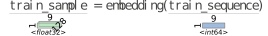

In [18]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    train_sample = embedding(train_sequence)

In [19]:
train_sample[0]

<tf.Tensor: shape=(9, 128), dtype=float32, numpy=
array([[-0.02426431, -0.00952917,  0.0357494 , ...,  0.00577818,
        -0.00682775, -0.00160482],
       [ 0.02389176, -0.02160711,  0.00585157, ..., -0.00827467,
        -0.03006337,  0.0246996 ],
       [-0.03401392,  0.03744053,  0.04696826, ...,  0.03757415,
        -0.01668758,  0.04519608],
       ...,
       [-0.02426431, -0.00952917,  0.0357494 , ...,  0.00577818,
        -0.00682775, -0.00160482],
       [ 0.00610971,  0.03142542, -0.0017832 , ..., -0.01897633,
         0.04090922,  0.00493909],
       [ 0.04995975,  0.0031953 , -0.04883406, ..., -0.04349866,
         0.00674409,  0.04575128]], dtype=float32)>

## Averaging across tokens

In [20]:
GlobalAveragePooling1D()(train_sample)

<tf.Tensor: shape=(1, 128), dtype=float32, numpy=
array([[-2.14687688e-03,  4.73760953e-03,  1.30923698e-02,
        -4.08010346e-05,  1.48016214e-02,  7.17852777e-03,
        -2.51920265e-03, -5.33556333e-03, -1.66066065e-02,
         9.97587480e-03,  1.30163860e-02, -5.26278745e-03,
         5.03923558e-03,  1.14222141e-02,  1.85871287e-03,
         7.78769841e-04, -2.08540377e-03, -1.16745010e-03,
        -1.41435408e-03, -4.03552968e-03,  5.04749944e-04,
         1.07930927e-03, -1.10211736e-03, -1.24862092e-02,
         1.33383535e-02, -1.06408270e-02,  8.76847375e-03,
         7.54538691e-04, -1.31889097e-02, -2.39292363e-04,
         1.21794023e-04, -1.86089650e-02, -1.39753092e-02,
        -1.16543658e-03, -1.29181650e-02,  1.39186187e-02,
        -3.46145825e-03, -1.05159953e-02,  1.45501625e-02,
         9.41791013e-03, -2.18208358e-02,  1.50176287e-02,
         9.90294293e-03, -1.73815042e-02,  1.49661107e-02,
        -1.02605773e-02, -8.91344715e-03,  1.58903208e-02,
      

![](images/Emb6.png)

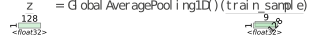

In [21]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(train_sample)

## Creating Word Embeddings for more than one sentence

In [22]:
# More than one sentence

test_corpus = [
    'The quick brown fox jumps over the lazy dog.',
    'The quick brown fox.',
    'The lazy dog.',
    'The dog.',
    'Dog and the fox.',
    'Hello, world!'
]
encoded_sentences = tokenizer.texts_to_sequences(test_corpus)
for sentence, encoded_sentence in zip(test_corpus, encoded_sentences):
    print(sentence, encoded_sentence)

The quick brown fox jumps over the lazy dog. [1, 2, 3, 4, 5, 6, 1, 7, 8]
The quick brown fox. [1, 2, 3, 4]
The lazy dog. [1, 7, 8]
The dog. [1, 8]
Dog and the fox. [8, 1, 4]
Hello, world! []


## Padding Sequences

In [23]:
# Length of each sentence in the corpus

[len(sentence) for sentence in encoded_sentences]

[9, 4, 3, 2, 3, 0]

In [24]:
# Length of the longest sentence

max([len(sentence) for sentence in encoded_sentences])

9

In [25]:
MAX_SEQUENCE_LENGTH = 9

In [26]:
# Padding sequences that are shorter than the longest sequence

X = pad_sequences(encoded_sentences, maxlen=MAX_SEQUENCE_LENGTH)
X

array([[1, 2, 3, 4, 5, 6, 1, 7, 8],
       [0, 0, 0, 0, 0, 1, 2, 3, 4],
       [0, 0, 0, 0, 0, 0, 1, 7, 8],
       [0, 0, 0, 0, 0, 0, 0, 1, 8],
       [0, 0, 0, 0, 0, 0, 8, 1, 4],
       [0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Embedding Layer

In [27]:
# Training data with more than 1 sentences

X.shape

(6, 9)

In [28]:
# Embeddings of the larger corpus

X_embedded = embedding(X)

In [29]:
X_embedded.shape

TensorShape([6, 9, 128])

In [30]:
X_embedded

<tf.Tensor: shape=(6, 9, 128), dtype=float32, numpy=
array([[[-0.02426431, -0.00952917,  0.0357494 , ...,  0.00577818,
         -0.00682775, -0.00160482],
        [ 0.02389176, -0.02160711,  0.00585157, ..., -0.00827467,
         -0.03006337,  0.0246996 ],
        [-0.03401392,  0.03744053,  0.04696826, ...,  0.03757415,
         -0.01668758,  0.04519608],
        ...,
        [-0.02426431, -0.00952917,  0.0357494 , ...,  0.00577818,
         -0.00682775, -0.00160482],
        [ 0.00610971,  0.03142542, -0.0017832 , ..., -0.01897633,
          0.04090922,  0.00493909],
        [ 0.04995975,  0.0031953 , -0.04883406, ..., -0.04349866,
          0.00674409,  0.04575128]],

       [[-0.00719173, -0.03596612,  0.0416692 , ..., -0.01222027,
          0.04970847,  0.01160336],
        [-0.00719173, -0.03596612,  0.0416692 , ..., -0.01222027,
          0.04970847,  0.01160336],
        [-0.00719173, -0.03596612,  0.0416692 , ..., -0.01222027,
          0.04970847,  0.01160336],
        ...,
 

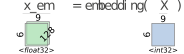

In [31]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    x_em = embedding(X)

In [32]:
X.shape

(6, 9)

In [33]:
x_em.shape

TensorShape([6, 9, 128])

## Averaging across tokens

![](images/Emb6.png)

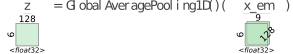

In [34]:
with tsensor.explain(fontname='Hack', dimfontname='Hack'):
    z = GlobalAveragePooling1D()(x_em)

In [35]:
z.shape

TensorShape([6, 128])

In [36]:
from datetime import datetime
import pytz

# Define the IST timezone
ist = pytz.timezone('Asia/Kolkata')

# Get the current time in UTC
utc_now = datetime.now(pytz.utc)

# Convert the current time to IST
ist_now = utc_now.astimezone(ist)

# Print the current time in IST
print("Current Time in IST:", ist_now.strftime('%Y-%m-%d %H:%M:%S'))

Current Time in IST: 2025-10-31 00:21:18
